<a href="https://colab.research.google.com/github/randyRivera0/LandUseAndWildlifeDLSemanticSegmentation/blob/main/Copy_of_LandUseAndWildlifeDLSemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Cidis LandUseAndWildlifeDLSemanticSegmentation project for Galapagos and ESPOL university](https://www.cidis.espol.edu.ec/sites/default/files/default_images/logo_defecto.png)](https://www.cidis.espol.edu.ec/)
# Train YOLO11 Object Detection on a Custom Galapagos Marine Iguana Dataset
---
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/randyRivera0/LandUseAndWildlifeDLSemanticSegmentation)

## Reference
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb#scrollTo=oe9vkEvFABbN)


In [1]:
!pip install ultralytics roboflow matplotlib inference ultralytics supervision roboflow

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of awscli to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of awscli to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.4/752.4 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from IPython import display
import matplotlib.pyplot as plt
import os
import cv2
from roboflow import Roboflow
import glob
from google.colab import files
from IPython.display import Image as IPyImage, display
from ultralytics import YOLO
from PIL import Image
import requests
import supervision as sv
import torch
import ultralytics
from google.colab import userdata
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
ultralytics.checks()
HOME = os.getcwd()

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.6/107.7 GB disk)


In [5]:
# Initialize Roboflow with your API key
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq") # Replace with your actual API key

## Avance de la semana 1

### Ejemplo

In [6]:
# Access the existing project
project = rf.workspace("geckos-land").project("hard-hat-sample-5adtr")  # Replace with your project name

# Download the dataset (specify the version you want)
dataset = project.version(3).download("yolov11") # Adjust version number as needed

# Path to the images
image_dir = dataset.location

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Sample-3 in yolov11:: 100%|██████████| 492/492 [00:00<00:00, 3224.78it/s]


In [7]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 data={image_dir}/data.yaml source="/content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg"

100% 49.7M/49.7M [00:00<00:00, 152MB/s]
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg: 640x640 6 persons, 1 sports ball, 2759.0ms
Speed: 15.5ms preprocess, 2759.0ms inference, 36.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [8]:
print(image_dir)

/content/Hard-Hat-Sample-3


In [9]:
# Set the path to the specific image subdirectory
test_image_dir = os.path.join(image_dir, 'test')  # Change 'test' to 'train' or 'valid' if needed

# List all files in the test image directory
images = os.listdir(test_image_dir)

# Filter to include only image files (e.g., .jpg, .png)
image_files = [img for img in images if img.endswith(('.jpg', '.png', '.jpeg'))]

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(test_image_dir, image_files[i])
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {image_files[i]}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")

In [10]:
# Set the path to the specific image subdirectory
image_dir = 'content/runs/detect/predict'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(img_path)}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


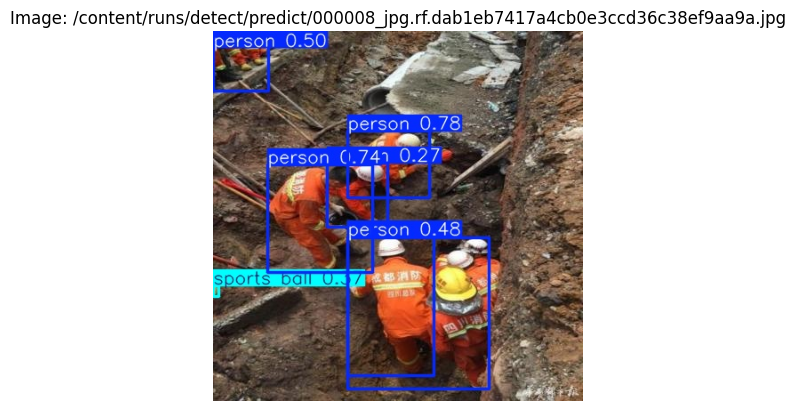

In [11]:
# Set the path to the specific image subdirectory
image_dir = '/content/runs/detect/predict/'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {img_path}")  # Show the full image path
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


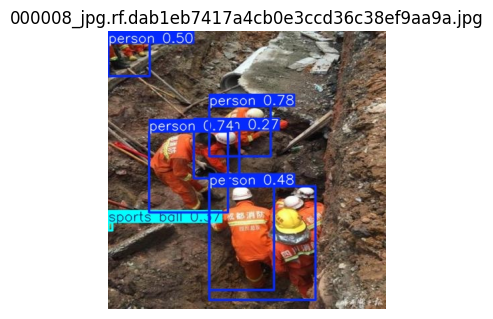

In [12]:
# Set the directory path
directory_path = '/content/runs/detect/predict/'

# List all files in the directory
files = os.listdir(directory_path)

# Filter for image files (you can add more formats if needed)
image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Create a subplot for each image
plt.figure(figsize=(15, 15))
for i, image_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(directory_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a subplot
    plt.subplot(5, 5, i + 1)  # Adjust the number of rows/columns as needed
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(image_file)  # Optional: Show the filename as title

plt.tight_layout()
plt.show()


In [13]:
labeled_images_dir = '/content/Hard-Hat-Sample-3/train/images'
unlabeled_images_dir = '/content/Hard-Hat-Sample-3/train/images'
labels_dir = '/content/Hard-Hat-Sample-3/train/labels'
labels = '/content/Hard-Hat-Sample-3/train/labels'

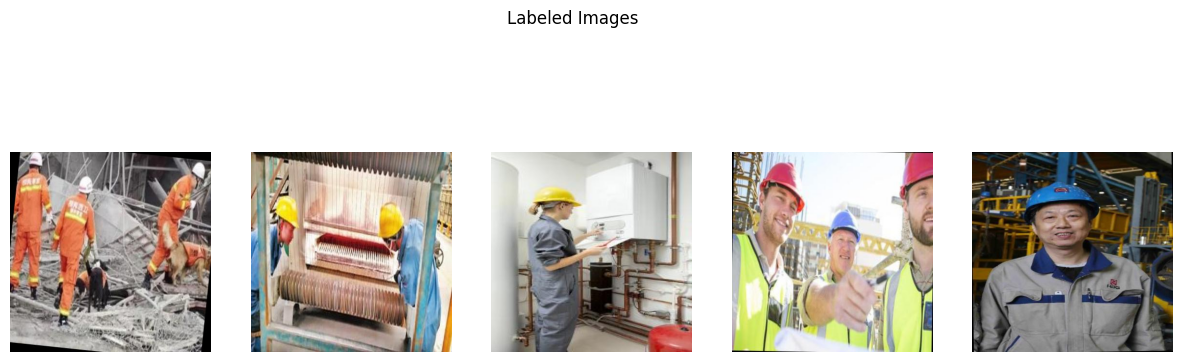

In [14]:
def display_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Get the image paths
labeled_images = [os.path.join(labeled_images_dir, img) for img in os.listdir(labeled_images_dir)]
unlabeled_images = [os.path.join(unlabeled_images_dir, img) for img in os.listdir(unlabeled_images_dir)]

# Display images
display_images(labeled_images, 'Labeled Images')


## Avance de la semana 2

### Asignación:
- Miguel Andrés Realpe Robalino: "Esta semana crea un dataset de iguanas. Para eso usa como base videos de dron que estan en la GPU de cidis. El acceso de anydesk es [privado]. Los videos estan em D:\Videos dron GALAPAGOS\Avistamiento Macrofauna Dron. Busca en los videos escenas que esten viendo directamente hacia abajo y selecciona unos 20 frames tratando de tener variedad de escenas (arena, roca, etc.). Crea un proyecto en roboflow y etiqueta con poligonos las iguanas en los frames y de alli crea un dataset."

### Tareas Completadas
- [x] Crear Dataset de Iguanas
- [x] Entrenar modelos con el Dataset

### Desafíos Enfrentados
- Hacen falta muchas más imágenes de Iguanas y animales en general. La mayoría de los videos son vistas aéreas muy alejadas con el dron.
- Soluciones: uso de suelo y aumentar la data

### Próximos Pasos
- Uso de suelo y mejorar el modelo.


### Training custom dataset

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [16]:
project = rf.workspace("geckos-land").project("galapagos-oxbrc")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Galapagos-3 in yolov11:: 100%|██████████| 56/56 [00:00<00:00, 3334.06it/s]


In [17]:
labeled_images_dir = '/content/Galapagos-1/train/images'
labels_dir = '/content/Galapagos-1/train/labels'

In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 161MB/s]
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Galapagos-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [19]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1729223305.7c37eb980313.1324.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


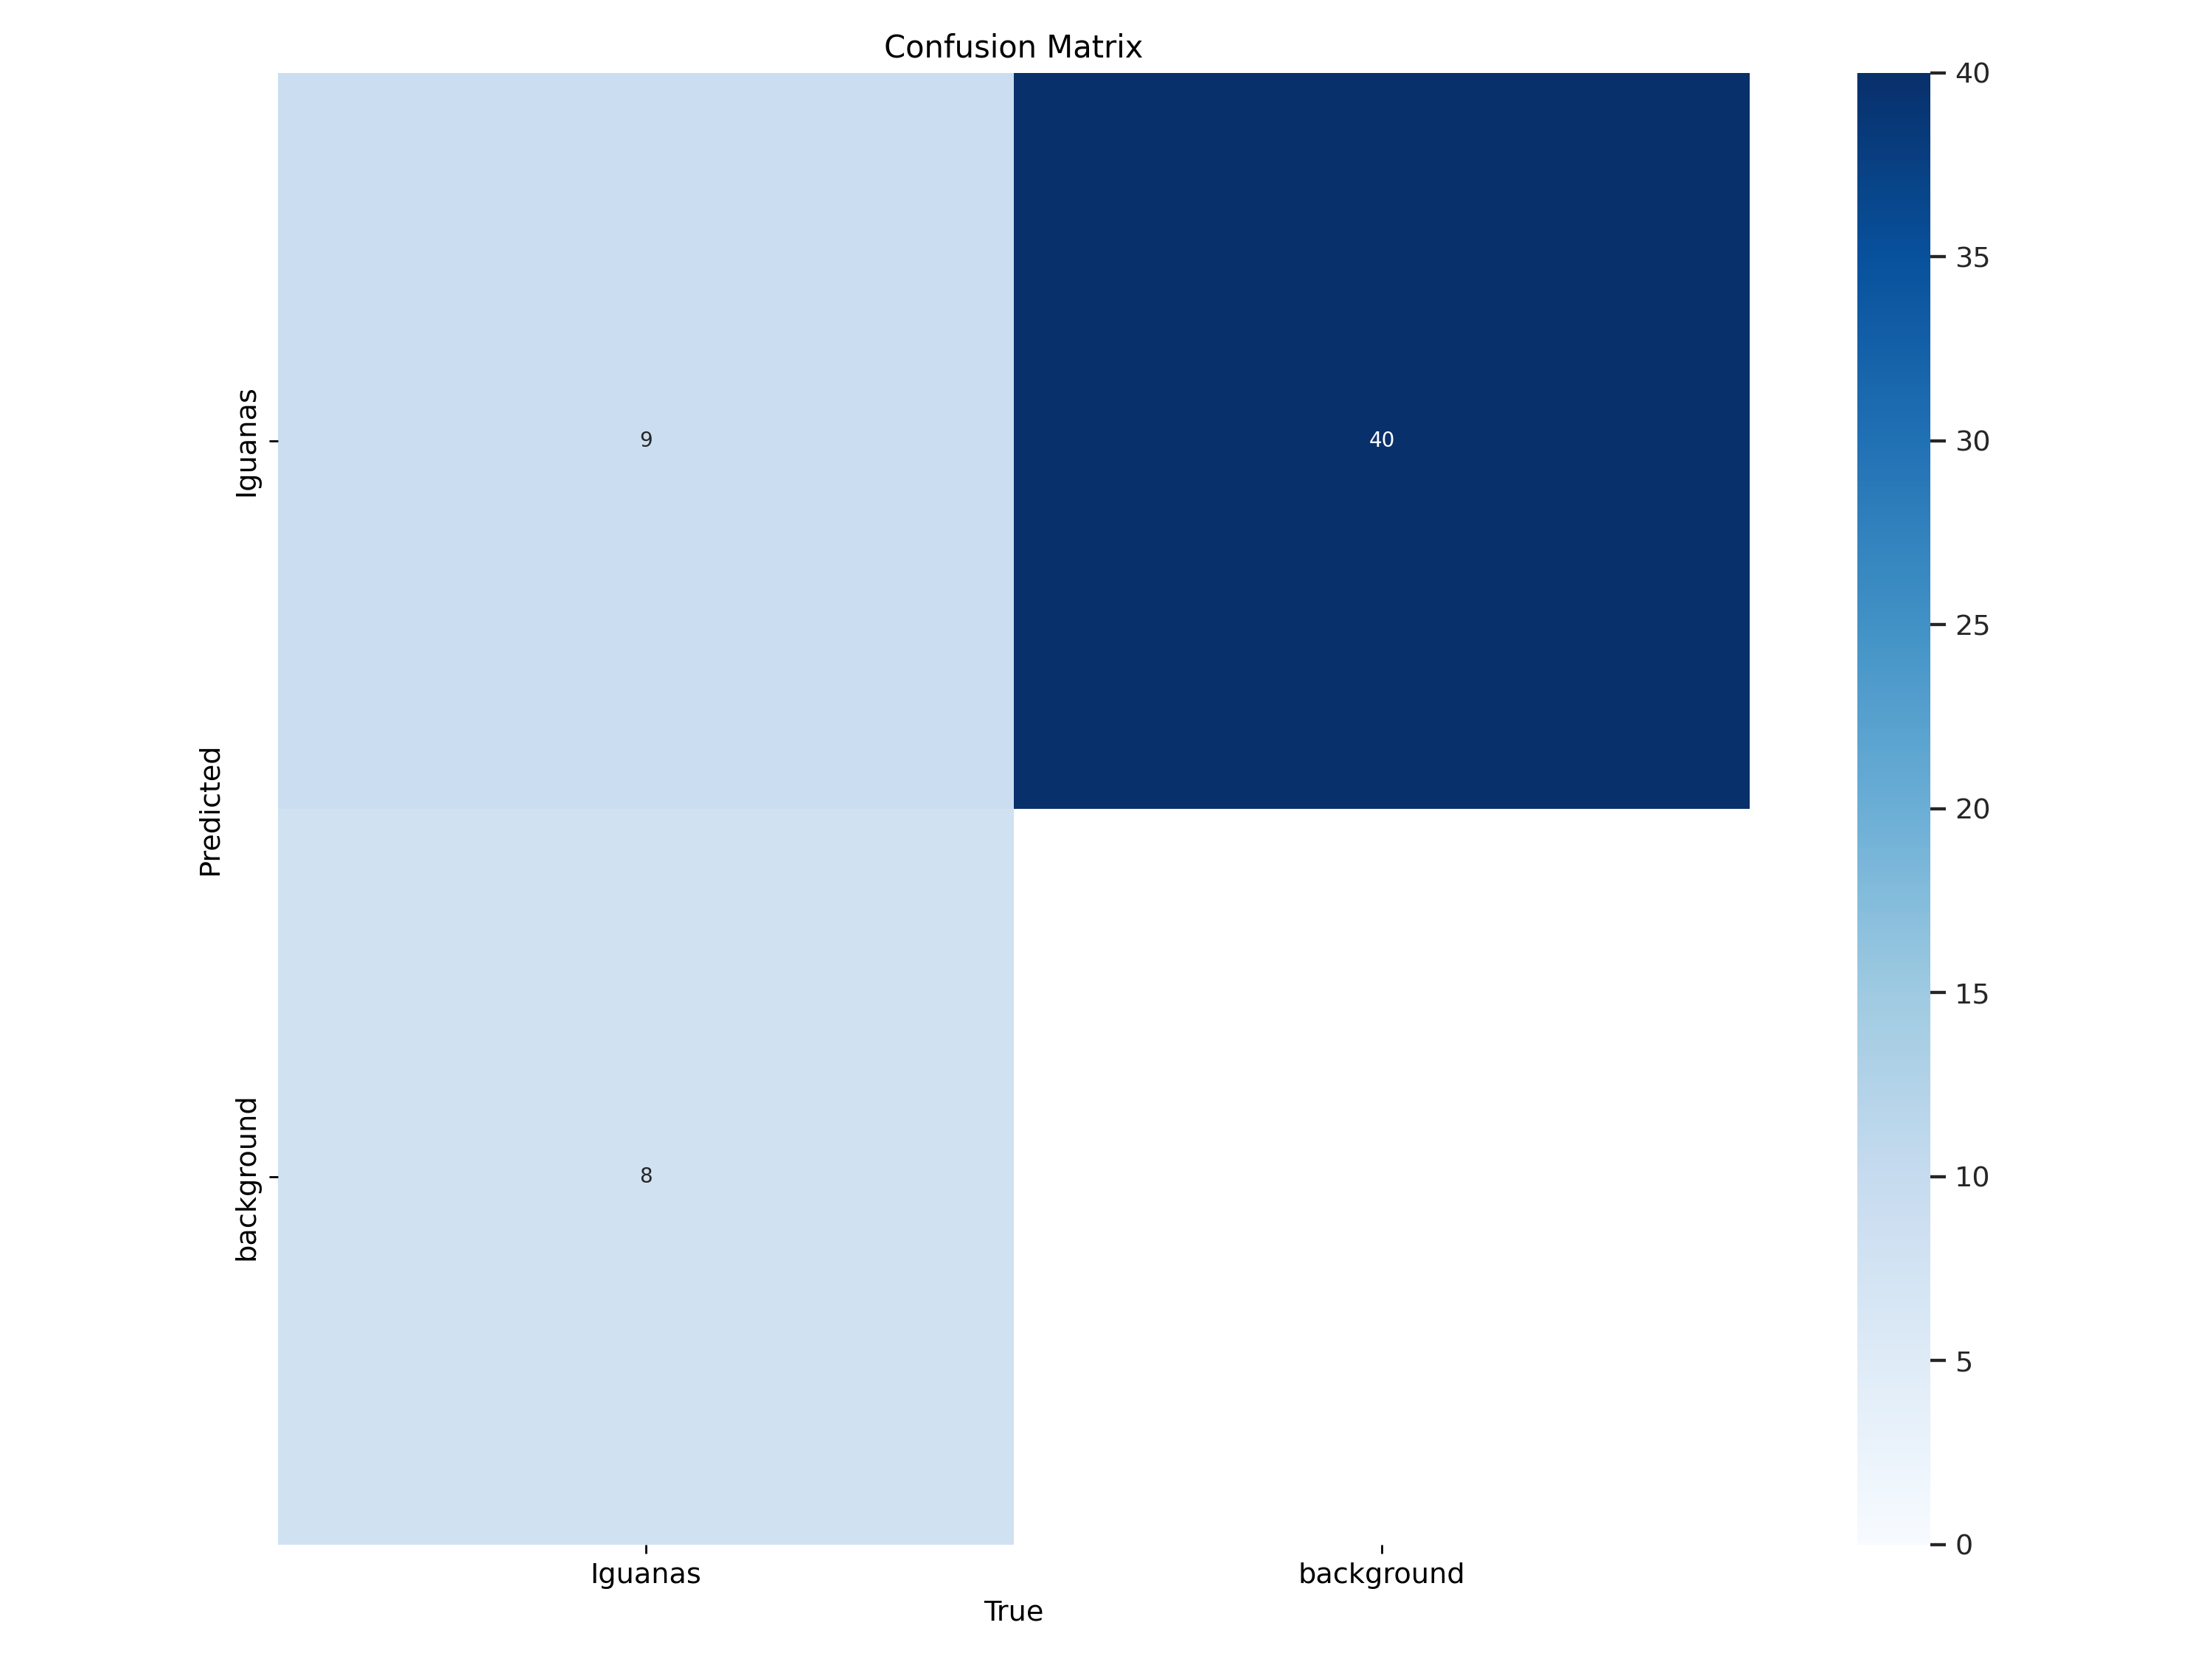

In [20]:
IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

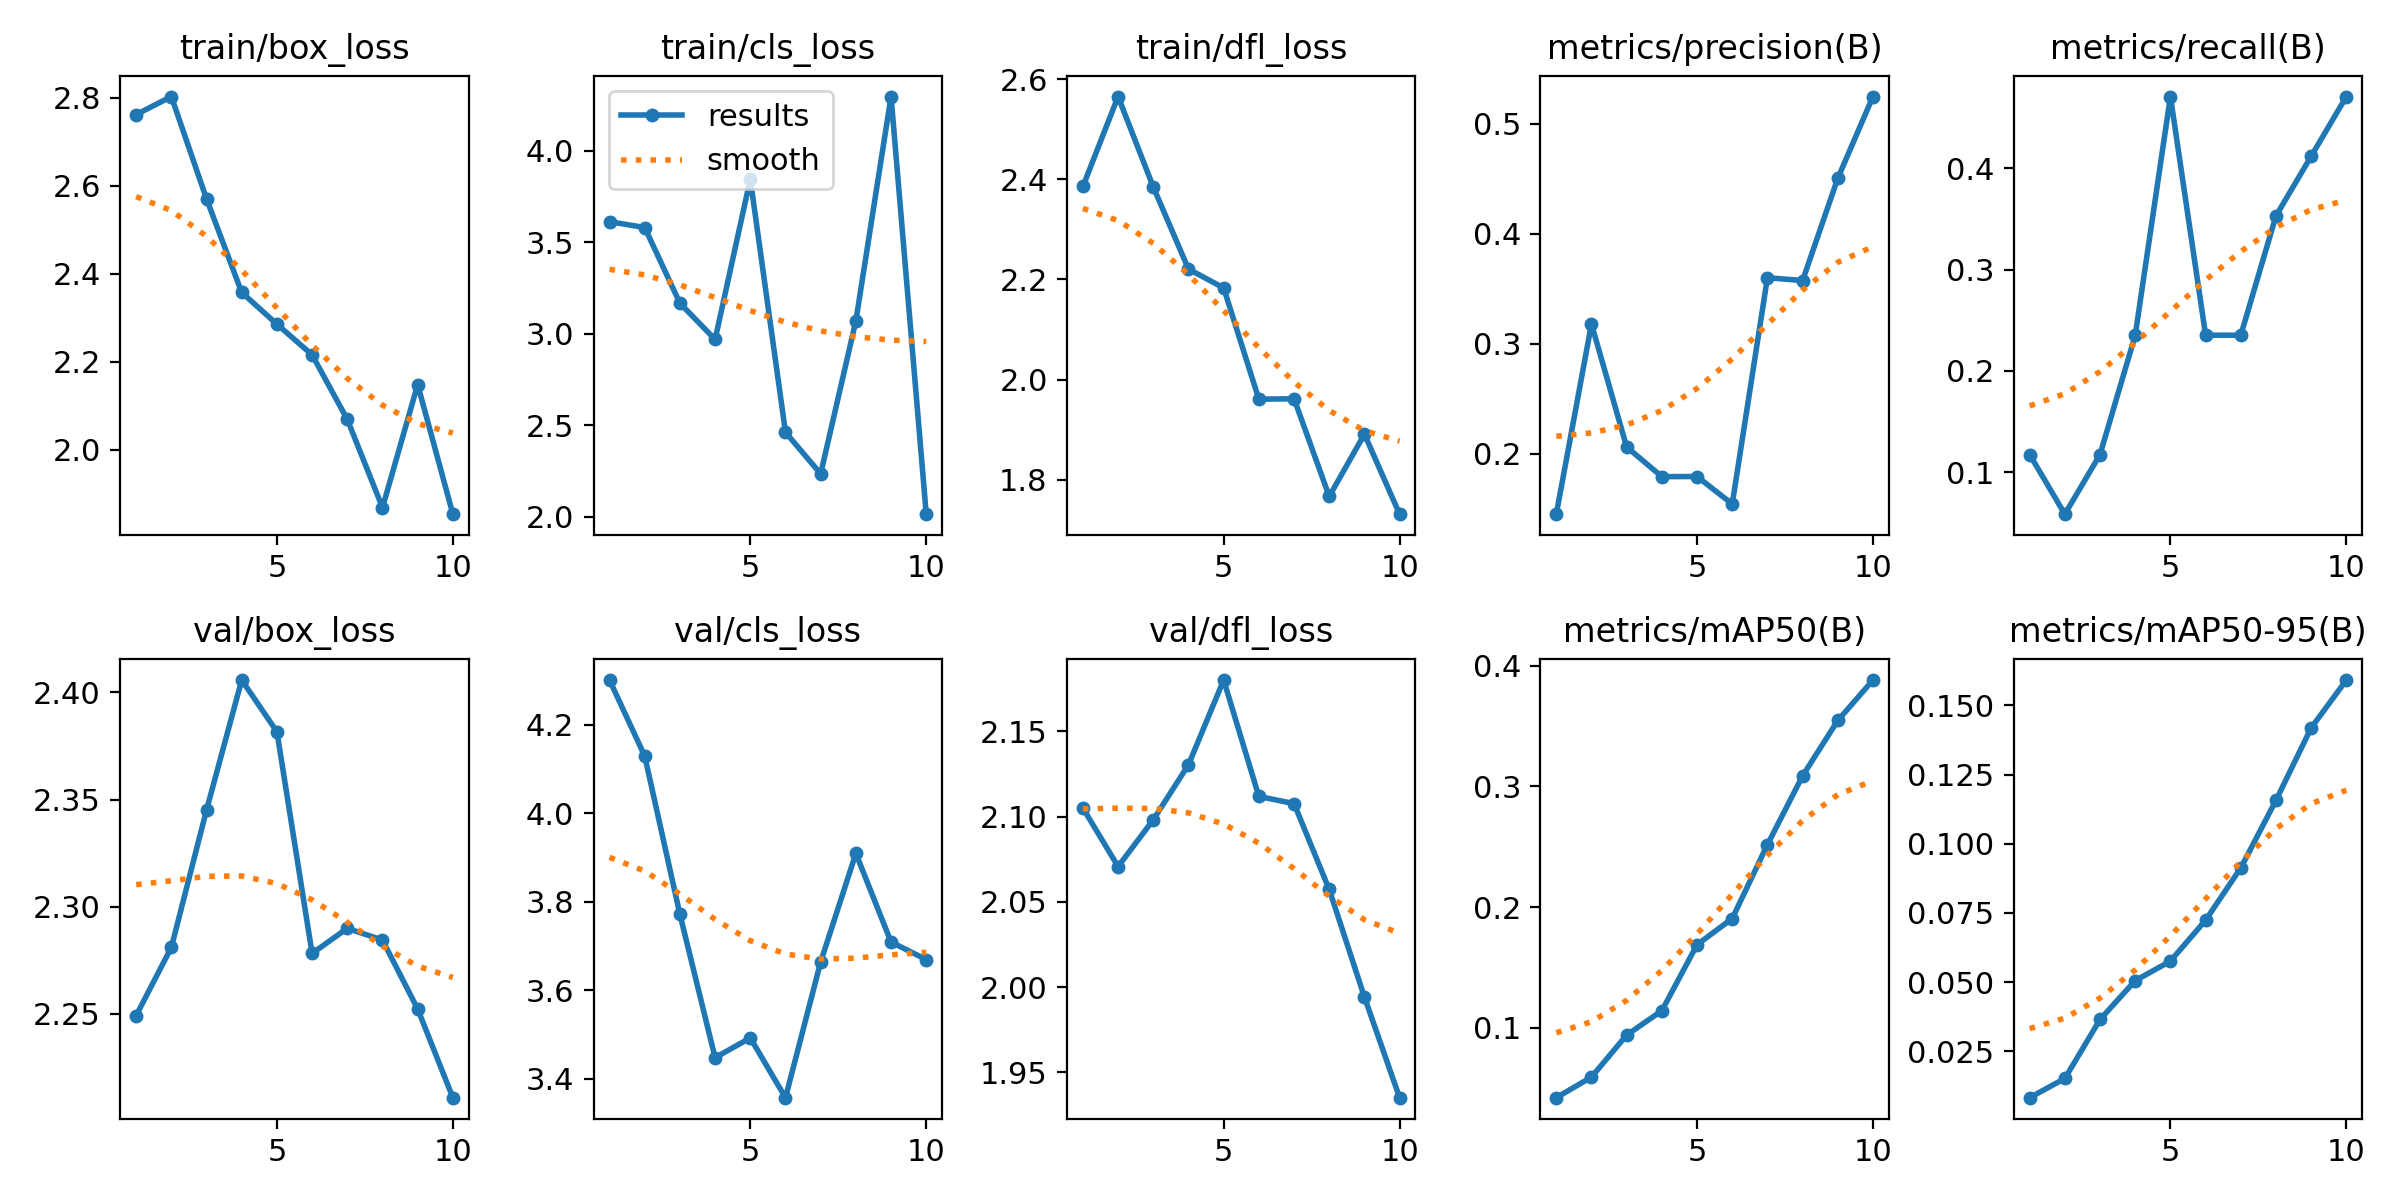

In [29]:
IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

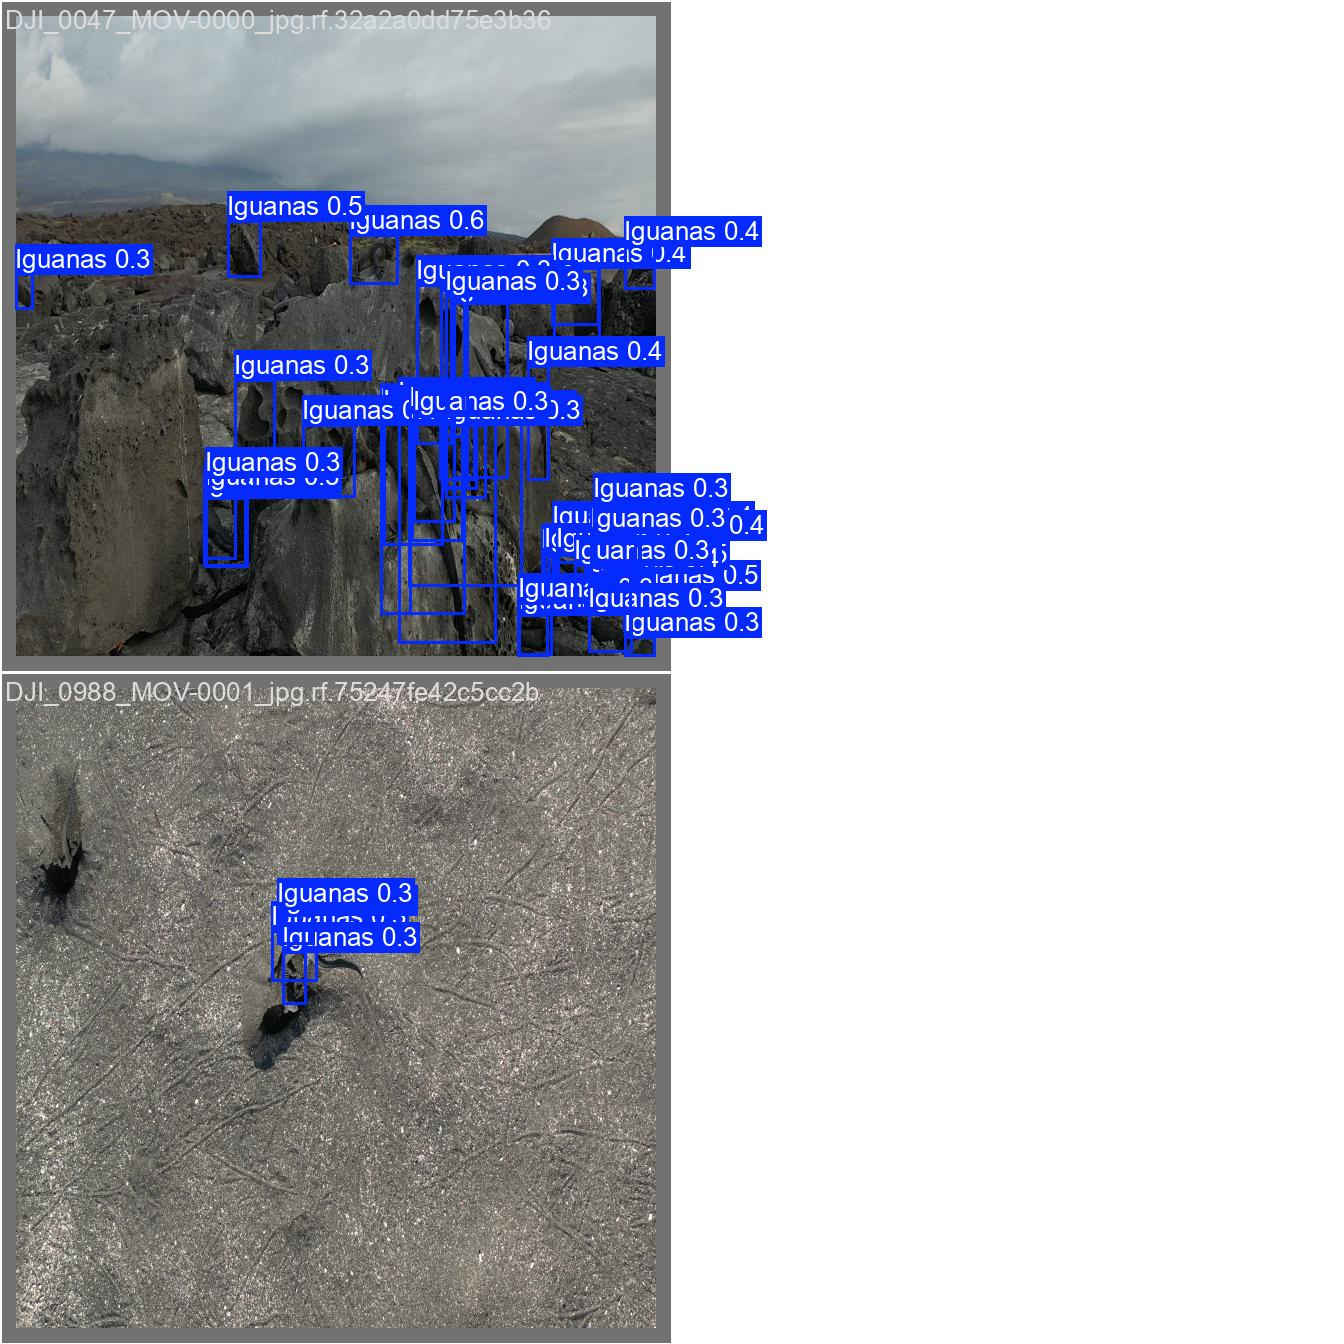

In [22]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validate fine-tuned model

In [23]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Galapagos-3/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.48s/it]
                   all          2         17      0.525      0.471      0.388       0.16
Speed: 20.1ms preprocess, 1008.8ms inference, 0.0ms loss, 173.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference with custom model

In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/2 /content/datasets/Galapagos-3/test/images/DJI_0485_MOV-0000_jpg.rf.78ba6f1838311513ab4a019a2d572e97.jpg: 640x640 219 Iguanass, 622.1ms
image 2/2 /content/datasets/Galapagos-3/test/images/gal_PNG.rf.9b95a93afb97d7cb18c87c5f2ca7ceb0.jpg: 640x640 5 Iguanass, 527.3ms
Speed: 4.9ms preprocess, 574.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


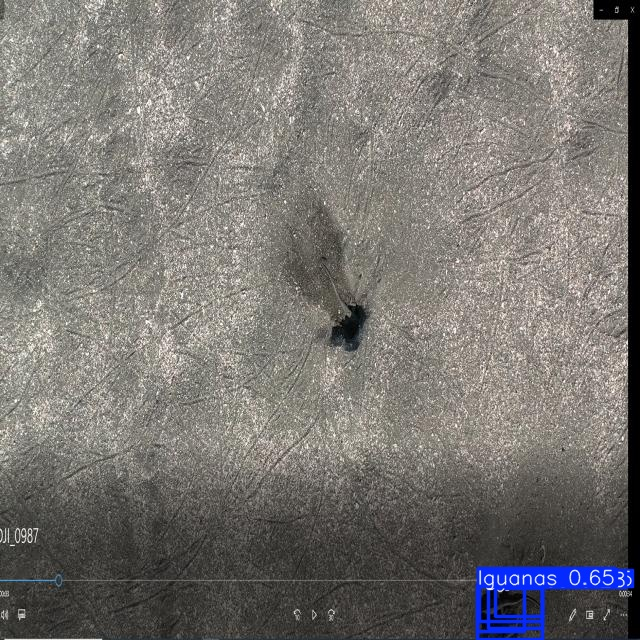

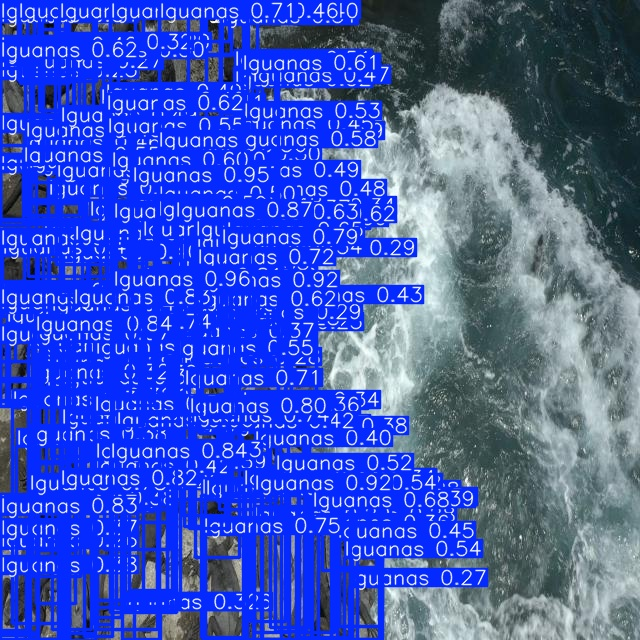

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Deploy model on Roboflow

In [27]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Running inference on DJI_0485_MOV-0000_jpg.rf.78ba6f1838311513ab4a019a2d572e97.jpg


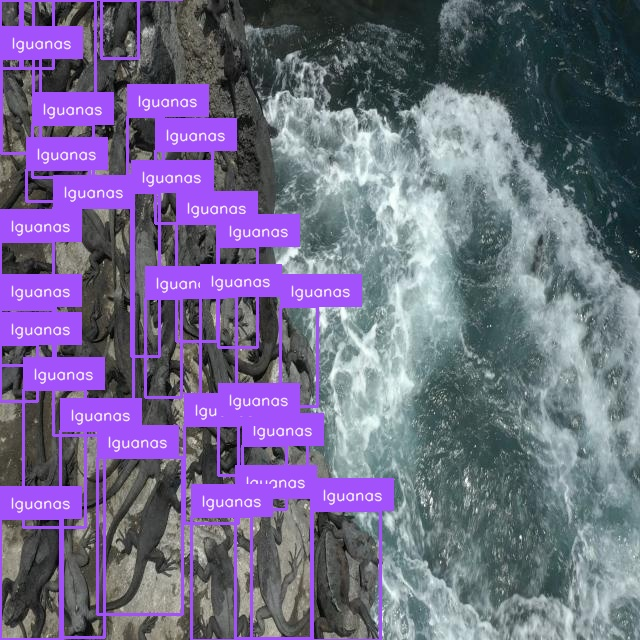

Running inference on gal_PNG.rf.9b95a93afb97d7cb18c87c5f2ca7ceb0.jpg


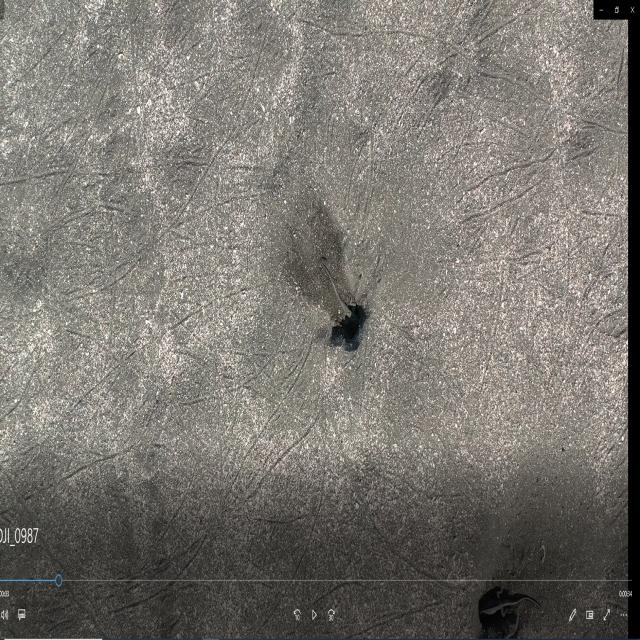

In [28]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
